## Importing Packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error,mean_absolute_error, median_absolute_error, r2_score

## Getting The Data

In [2]:
Data = pd.read_csv("Data.csv")

# 1) Data Describe & Visualization

In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       262 non-null    object 
 1   Open       262 non-null    float64
 2   High       262 non-null    float64
 3   Low        262 non-null    float64
 4   Close      262 non-null    float64
 5   Adj Close  262 non-null    float64
 6   Volume     262 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.5+ KB


In [4]:
Data.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,27-01-20,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,28-01-20,71.654999,71.654999,71.178001,71.440002,71.440002,0


In [5]:
Data['Date']=pd.to_datetime(Data['Date']) 

C:\Users\MoHaMeD\AppData\Local\Temp\ipykernel_9656\386759746.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Data['Date']=pd.to_datetime(Data['Date'])


In [6]:
Data = Data.sort_values(by='Date',ascending=True)

In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262 entries, 47 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       262 non-null    datetime64[ns]
 1   Open       262 non-null    float64       
 2   High       262 non-null    float64       
 3   Low        262 non-null    float64       
 4   Close      262 non-null    float64       
 5   Adj Close  262 non-null    float64       
 6   Volume     262 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 16.4 KB


In [8]:
Data.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
47,2020-01-04,76.110001,77.377602,75.324997,75.324997,75.324997,0
69,2020-01-05,75.720001,76.144997,75.072998,75.720001,75.720001,0


In [9]:
print(f" Date Is Between {Data.Date.min()} : {Data.Date.max()}")

 Date Is Between 2020-01-04 00:00:00 : 2021-12-01 00:00:00


In [10]:
print(f"Total Days : {(Data.Date.max() - Data.Date.min() ).days} Day")

Total Days : 697 Day


In [11]:
Data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
Data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Some Visualization To Describe The Data

<Axes: >

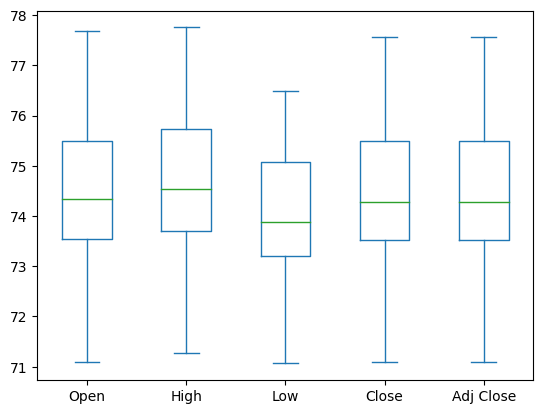

In [13]:
Data[['Open','High','Low','Close','Adj Close']].plot(kind='box')

C:\Users\MoHaMeD\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MoHaMeD\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MoHaMeD\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MoHaMeD\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as

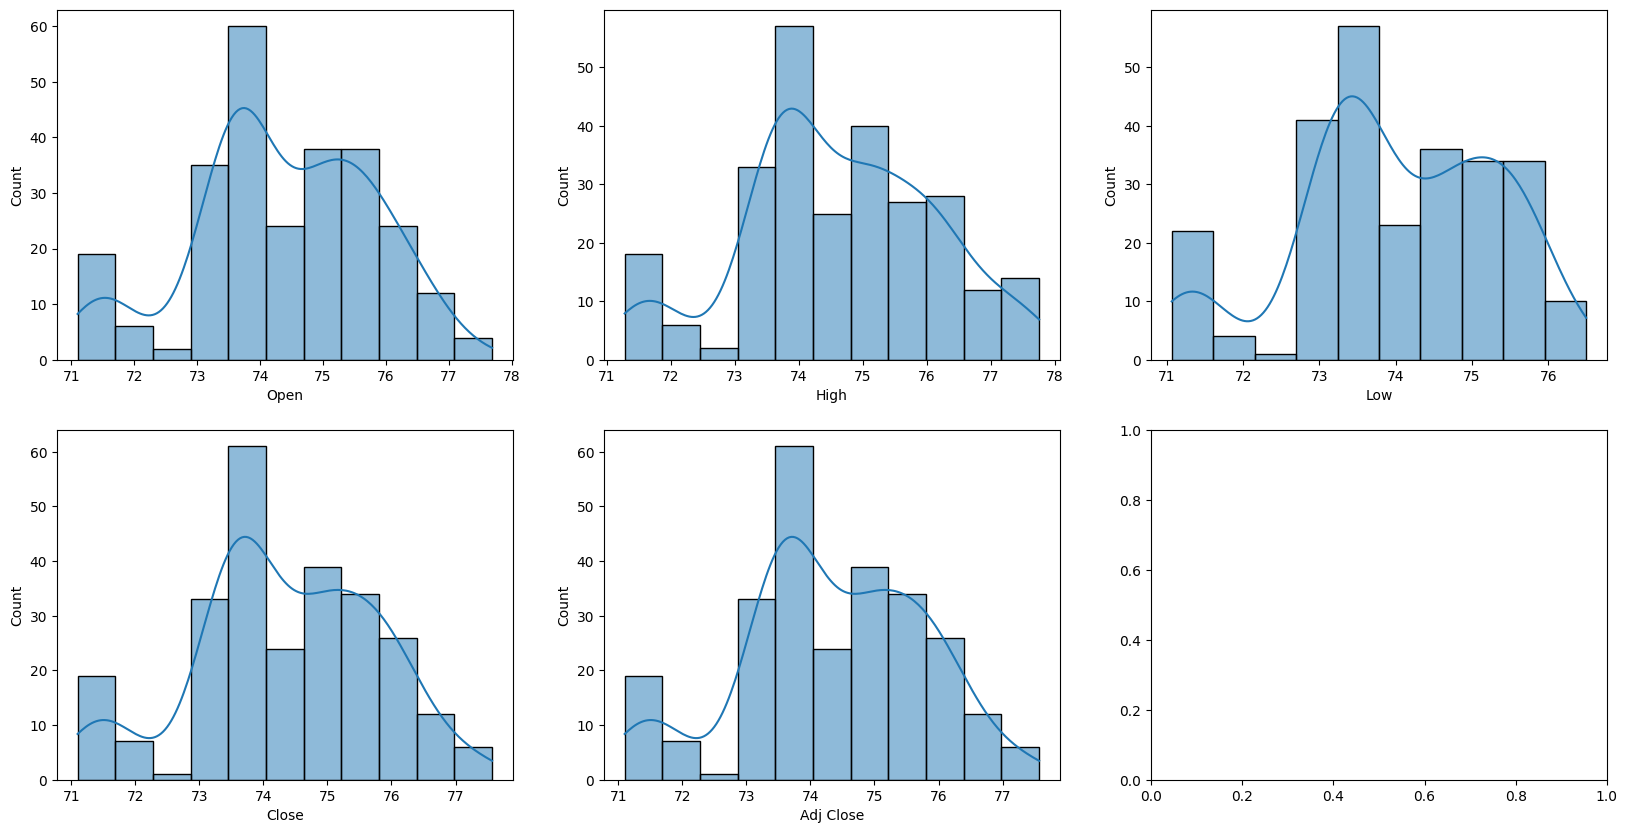

In [14]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10) )
sns.histplot(Data['Open'], kde=True, ax= axs[0,0])
sns.histplot(Data['High'], kde=True, ax= axs[0,1])
sns.histplot(Data['Low'], kde=True, ax= axs[0,2])
sns.histplot(Data['Close'], kde=True, ax= axs[1,0])
sns.histplot(Data['Adj Close'], kde=True, ax= axs[1,1])


plt.show()

**As We See At The Figuers Above We Can See, Most Passengers don't have neither parents nor children aboard.**

In [15]:
LineData= {'x':Data['Date'], 'y':Data['Open']}

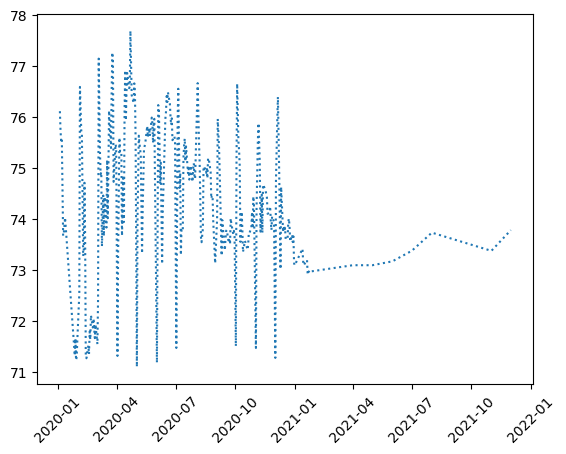

In [16]:
plt.plot(LineData['x'], LineData['y'], linestyle = 'dotted')
plt.xticks(rotation=45)
plt.show()

In [17]:
Corr=Data.corr()

<Axes: >

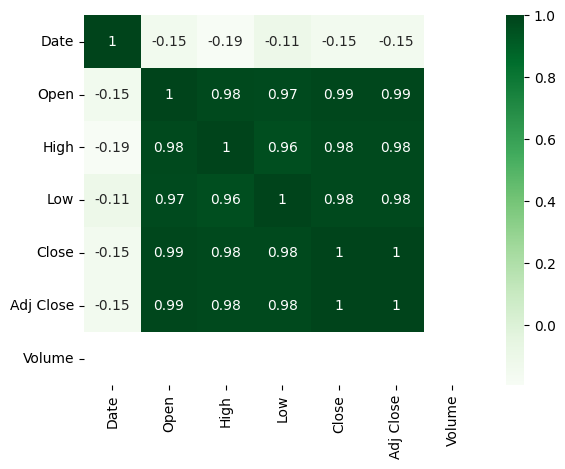

In [18]:
sns.heatmap(Corr, annot=True, cmap='Greens')

# 2- Transformation


## **Drop Unneccary Columns At Data**

In [19]:
Data = Data.drop(['Volume', 'Adj Close'], axis=1 )

In [20]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262 entries, 47 to 251
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    262 non-null    datetime64[ns]
 1   Open    262 non-null    float64       
 2   High    262 non-null    float64       
 3   Low     262 non-null    float64       
 4   Close   262 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 12.3 KB


In [21]:
Data.head(2)

,Date,Open,High,Low,Close
47,2020-01-04,76.110001,77.377602,75.324997,75.324997
69,2020-01-05,75.720001,76.144997,75.072998,75.720001


In [22]:
TrainData['Sex'] = LE.fit_transform(TrainData['Sex'])

PredicttData['Sex'] = LE.fit_transform(PredicttData['Sex'])

NameError: name 'LE' is not defined

In [ ]:
TrainData['Embarked'] = LE.fit_transform(TrainData['Embarked'])

PredicttData['Embarked'] = LE.fit_transform(PredicttData['Embarked'])

 **Correlation Between Survived And Other Columns**

In [ ]:
TrainData.corr()['Survived'].sort_values(ascending=False)

In [ ]:
sns.heatmap(TrainData.corr(), cmap="YlGnBu", annot=True)

**As Wee See THe Correlaton Between The Fare And Survied IS A little big**<br> 
**Any Other Specs Is Not Correlated With Survived <br> 
or Not even Correlated by little Correlation <br> 
Except The Parch Column**

# 3- Creation The Models

#### Split Data Into Features And Target And Makes Models Of Predictive

In [23]:
Features = Data[['Open','High','Low']]
Target = Data['Close']

In [24]:
Features.sample(2)

,Open,High,Low
186,73.350800,73.504997,73.245598
245,73.092003,73.200996,72.798500


In [25]:
Target.sample(2)

259    72.954903
69     75.720001
Name: Close, dtype: float64

##### Scaling  The Data With **MinMaxScaler**

In [26]:
Scaler = MinMaxScaler(feature_range=(1,2))

In [27]:
S_Features = Scaler.fit_transform(Features)

Target = Target.values
Target = Target.reshape(-1, 1)
S_Target = Scaler.fit_transform(Target)

C:\Users\MoHaMeD\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\MoHaMeD\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\MoHaMeD\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\MoHaMeD\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: Future

**Split The Data To Train And Test Models**

In [29]:
X_train, X_test, y_train, y_test = train_test_split(S_Features, S_Target, test_size = 0.4, random_state=42)

In [30]:
### MAKING MODEL ###
L_G_MODEL=LinearRegression()

### TRAINING MODEL ###
L_G_MODEL.fit(X_train,y_train)

### PREDECT BY MODEL ###
Predect_Values=L_G_MODEL.predict(X_test)


In [ ]:
LR_matrices = {"accuracy" : [], "precision" : [], "recall" : [], "f1-score" : []}
size = .5

while size >= .1:

    x_train1, x_test1, y_train1, y_test1 =train_test_split(S_Features, S_Target, test_size=size, shuffle=False)
    
    ### MAKING MODEL ###
    L_G_MODEL=LinearRegression()
    
    ### TRAINING MODEL ###
    L_G_MODEL.fit(X_train,y_train)
    
    ### PREDECT BY MODEL ###
    Predect_Values=L_G_MODEL.predict(X_test)

    KNNModel= KNeighborsClassifier()

    KNNModel.fit(x_train1,y_train1)

    y_pred1 = KNNModel.predict(x_test1)


    accuracy = accuracy_score(y_test1, y_pred1)
    KNN_matrices["accuracy"].append(accuracy * 100)
        
    precision = precision_score(y_test1, y_pred1)
    KNN_matrices["precision"].append(precision * 100)
    
    recall = recall_score(y_test1, y_pred1)
    KNN_matrices["recall"].append(recall * 100)
    
    f1Score = f1_score(y_test1, y_pred1)
    KNN_matrices["f1-score"].append(f1Score * 100)
    
    
    size -= .05

In [ ]:
# training_size = ["50%","55%","60%", "65%", "70%", "75%", "80%", "85%", "90%"]


# plt.plot(training_size , KNN_matrices['accuracy'], label="Accuracy")
# plt.plot(training_size , KNN_matrices['precision'], label="Precision")
# plt.plot(training_size , KNN_matrices['recall'], label="Recall")
# plt.plot(training_size , KNN_matrices['f1-score'], label="F1-Score")

# plt.ylabel("%")
# plt.xlabel("Training Size")
# plt.legend(loc="upper left")
# plt.grid(linestyle='--', linewidth=1)

# Evaloution

In [ ]:
#----------------------------------------------------
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, Predect_Values) # it can be raw_values
print('Mean Absolute Error Value is : ',round(MAEValue,4))

In [ ]:
#----------------------------------------------------
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, Predect_Values) # it can be raw_values
print('Mean Squared Error Value is : ',round(MSEValue,4))

In [ ]:
#----------------------------------------------------
#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test, Predect_Values)
print('Median Squared Error Value is : ',round(MdSEValue,4))

In [ ]:
#----------------------------------------------------
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test,Predect_Values))

In [ ]:
from sklearn.metrics import zero_one_loss
#----------------------------------------------------
print('Logistic Regression')
Z_O_L = zero_one_loss(y_test,y_pred,normalize=False) 
print('Zero One Loss Value : ', Z_O_L )
#----------------------------------------------------
print('\nKNN')

Z_O_L1 = zero_one_loss(y_test1,y_pred1,normalize=False) 
print('Zero One Loss Value : ', Z_O_L1 )
#----------------------------------------------------
print('\nSVC')

Z_O_L2 = zero_one_loss(y_test2,y_pred2,normalize=False) 
print('Zero One Loss Value : ', Z_O_L2 )
#----------------------------------------------------
print("\nDecision TREE")

Z_O_L3 = zero_one_loss(y_test3,y_pred3,normalize=False)
print('Zero One Loss Value : ', Z_O_L3 )

In [ ]:
y_pred_proba    = LRModel.predict_proba(x_test)[::,1]
fpr, tpr, _     = roc_curve(y_test,  y_pred_proba, pos_label=1)
auc             = roc_auc_score(y_test, y_pred_proba)
#-------------------------------------------------------------

y_pred_proba1   = KNNModel.predict_proba(x_test1)[::,1]
fpr1, tpr1, _   = roc_curve(y_test1,  y_pred_proba1, pos_label=1)
auc1            = roc_auc_score(y_test1, y_pred_proba1)

#-------------------------------------------------------------

y_pred_proba2   = SVCModel.predict_proba(x_test2)[::,1]
fpr2, tpr2, _   = roc_curve(y_test2,  y_pred_proba2, pos_label=1)
auc2            = roc_auc_score(y_test2, y_pred_proba2)
                                     
#-------------------------------------------------------------

y_pred_proba3   = DTModel.predict_proba(x_test3)[::,1]
fpr3, tpr3, _   = roc_curve(y_test3,  y_pred_proba3, pos_label=1)
auc3            = roc_auc_score(y_test3, y_pred_proba3)

In [ ]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
plt.plot(fpr,tpr,label="AUC="+str(auc))

plt.title ('ROC Curve for Logistic Regression Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(linestyle = '--', linewidth = 1)
plt.legend(loc='lower right')


plt.subplot(2,2,2)
plt.plot(fpr1,tpr1,label="AUC="+str(auc1))

plt.title ('ROC Curve for KNN Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(linestyle = '--', linewidth = 1)
plt.legend(loc='lower right')


plt.subplot(2,2,3)
plt.plot(fpr2,tpr2,label="AUC="+str(auc2))

plt.title ('ROC Curve for SVC Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(linestyle = '--', linewidth = 1)
plt.legend(loc='lower right')


plt.subplot(2,2,4)
plt.plot(fpr3,tpr3,label=f"AUC={str(auc3)}")

plt.title ('ROC Curve for Decision Tree Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(linestyle = '--', linewidth = 1)
plt.legend(loc='lower right')


plt.show()

In [ ]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
CM = confusion_matrix(y_test,y_pred) #Calculating Confusion Matrix
# drawing confusion matrix
sns.heatmap(CM,annot=True ,cmap='binary')  #CM/np.sum(CM),fmt='.1%'
plt.title("Logistic Regression")

plt.subplot(2,2,2)

CM = confusion_matrix(y_test1,y_pred1) #Calculating Confusion Matrix
# drawing confusion matrix
sns.heatmap(CM,annot=True ,cmap='binary')  #CM/np.sum(CM),fmt='.1%'
plt.title("KNN")

plt.subplot(2,2,3)

CM = confusion_matrix(y_test2,y_pred2) #Calculating Confusion Matrix
# drawing confusion matrix
sns.heatmap(CM,annot=True ,cmap='binary')  #CM/np.sum(CM),fmt='.1%'
plt.title("SVC")

plt.subplot(2,2,4)

CM = confusion_matrix(y_test3,y_pred3) #Calculating Confusion Matrix
# drawing confusion matrix
sns.heatmap(CM,annot=True ,cmap='binary')  #CM/np.sum(CM),fmt='.1%'
plt.title("Decision Tree")

plt.show()

In [ ]:
#LG
accuracy =accuracy_score(y_test,y_pred) *100
precision=precision_score(y_test,y_pred)*100
recall   =recall_score(y_test,y_pred)   *100
F1_score =f1_score(y_test,y_pred)       *100

print(f"Accuracy {accuracy}\nPrecision {precision}\nRecall {recall}\nF1-Score {F1_score}")

In [ ]:
#KNN 
accuracy1 =accuracy_score(y_test1,y_pred1)   *100 
precision1=precision_score(y_test1,y_pred1)  *100
recall1   =recall_score(y_test1,y_pred1)     *100
f1_score1 =f1_score(y_test1,y_pred1)         *100

print(f"Accuracy {accuracy1}\nPrecision {precision1}\nRecall {recall1}\nF1-Score {f1_score1}")

In [ ]:
#SVC
accuracy2 =accuracy_score(y_test2,y_pred2)   *100
precision2=precision_score(y_test2,y_pred2)  *100 
recall2   =recall_score(y_test2,y_pred2)     *100
f1_score2 =f1_score(y_test2,y_pred2)         *100


print(f"Accuracy {accuracy2}\nPrecision {precision2}\nRecall {recall2}\nF1-Score {f1_score2}")

In [ ]:
#DT
accuracy3 =accuracy_score(y_test3,y_pred3)   *100
precision3=precision_score(y_test3,y_pred3)  *100
recall3   =recall_score(y_test3,y_pred3)     *100
f1_score3 =f1_score(y_test3,y_pred3)         *100


print(f"Accuracy {accuracy3}\nPrecision {precision3}\nRecall {recall3}\nF1-Score {f1_score3}")

# Prediction With Linear Regression

In [ ]:
def Predect(open,high,low):
    result = L_G_MODEL.predict([open, high, low])
    return result

**Sample Of Data**

|	Open	 |      High |	Low	     |   Close   |
|------------|:---------:|:---------:|----------:|
|	71.300003|	71.711998|	71.300003|	71.300003|
|	71.639999|	71.639999|	71.277496|	71.639999|
|	71.544998|	71.699997|	71.265503|	71.496498|
|	71.314102|	71.514999|	71.084999|	71.314102|
|	71.100403|	71.279999|	71.099899|	71.099998|
|	71.181	 |  71.397499|	71.121002|	71.18    |
|	71.470001|  71.570999|	71.177498|	71.470001|

In [ ]:
PREDICTIONLIST=[]
Samples= [[71.300003, 71.711998, 71.300003],
             [71.639999	, 71.639999, 71.277496],
             [71.544998	, 71.699997, 71.265503],
             [71.314102 , 71.514999, 71.084999],
             [71.100403	, 71.279999, 71.099899]]

for x in range(len(Samples)):    
    Array  = np.asarray(Samples[x])
        
    Re_Array = Array.reshape(1,-1)
    
    PREDICTION = L_G_MODEL.predict(Re_Array)

    PREDICTIONLIST.append(PREDICTION)

In [ ]:
PREDICTIONLIST

# THANK YOU